In [1]:
import matplotlib.pyplot as plt
import numpy as np
import omf
import omfvtk
import pandas as pd
import vtki

In [2]:
import sys
# This makes the gdc19 package available
sys.path.append('../../')
import gdc19
gdc19.setup_adam()

ModuleNotFoundError: No module named 'gdc19'

## Well 58-32 geophysical well log analysis

Lithology:
Basin Fill (0 to 1007 m), Granitoid (1007 to 2296.9 m)

Density of Granite: 2.75 g/cm3

Coordinates: x = 335380.766, y = 4263040.83, z = 1681.61659

Depth: 2296.9 m

In [147]:
well_log = pd.read_csv('58-32_main_geophysical_well_log.csv')
well_log.head()

,Depth (ft),Depth (m),AF10,AF20,AF30,AF60,AF90,AO10,AO20,AO30,...,SPAR,STIT,TENS,TNPH,HTNP_SAN,ATCO10,ATCO20,ATCO30,ATCO60,ATCO90
0,10.5,3.20,1.104,0.4224,20.9881,1950.0,44.9381,1.1341,0.5586,2.1295,...,-999.25,0.0,940.9999,-999.25,0.3744,840.4879,2040.422,35.6775,14.1442,50.6664
1,11.0,3.35,1.104,0.4224,20.9881,1950.0,44.9381,1.1341,0.5586,2.1295,...,-999.25,0.0,940.9999,-999.25,0.3744,840.4879,2040.422,35.6775,14.1442,50.6664
2,11.5,3.51,1.104,0.4224,20.9881,1950.0,44.9381,1.1341,0.5586,2.1295,...,-999.25,0.0,940.9999,-999.25,0.3744,840.4879,2040.422,35.6775,14.1442,50.6664
3,12.0,3.66,1.104,0.4224,20.9881,1950.0,44.9381,1.1341,0.5586,2.1295,...,-999.25,0.0,940.9999,-999.25,0.3744,840.4879,2040.422,35.6775,14.1442,50.6664
4,12.5,3.81,1.104,0.4224,20.9881,1950.0,44.9381,1.1341,0.5586,2.1295,...,-999.25,0.0,940.9999,-999.25,0.3744,840.4879,2040.422,35.6775,14.1442,50.6664


In [148]:
trajectory = pd.read_csv('trajectory_58-32.csv')
trajectory.head()

,Depth (m),Dip,Azimuth,Elevation (m)
0,0.0,90.0,0.00,1681.616587
1,84.7,89.7,20.59,1596.916587
2,177.4,89.7,205.90,1504.216587
3,264.6,89.6,1.00,1417.016587
4,361.2,89.0,346.00,1320.416587


In [149]:
# start_x = 335380.766
# start_y = 4263040.83
# count = 0

# theta = []
# phi = []
# r = well_log['Depth (m)'].values
# depth = trajectory['Depth (m)'].values
# dip = trajectory['Dip'].values
# azimuth = trajectory['Azimuth'].values

# #while (count < len(trajectory.index)):
# for i in range (0, len(r)):
#     if (r[i] >= depth[count]) & (r[i] < depth[count+1]):
#         theta.append(dip[count])
#         phi.append(azimuth[count])
#     if (r[i] >= depth[count+1]):
#         count = count + 1
#         theta.append(dip[count])
#         phi.append(azimuth[count])


# r[1:] = r[1:] - r[:-1]

# # convert to radians
# phi = phi * 2 * np.pi / 360.
# theta = (90+theta) * 2 * np.pi / 360.


# x = start_x + (r*np.cos(phi)*np.sin(theta))
# y = start_y + (r*np.sin(phi)*np.sin(theta))
# z = (r*np.cos(theta))

# elevation = np.cumsum(z) + start_z

# #print(len(theta))
# #print(phi)

In [151]:
x_location = []
y_location = []
elevation = []
DEPTH = well_log['Depth (m)'].values

for i in range (0, len(well_log.index)):
    x = 335380.766
    y = 4263040.83
    z = 1681.61659 - DEPTH[i]
    x_location.append(x)
    y_location.append(y)
    elevation.append(z)

In [152]:
well_log = well_log.assign(x=pd.Series(x_location).values)
well_log = well_log.assign(y=pd.Series(y_location).values)
well_log = well_log.assign(z=pd.Series(elevation).values)
well_log.head()

,Depth (ft),Depth (m),AF10,AF20,AF30,AF60,AF90,AO10,AO20,AO30,...,TNPH,HTNP_SAN,ATCO10,ATCO20,ATCO30,ATCO60,ATCO90,x,y,z
0,10.5,3.20,1.104,0.4224,20.9881,1950.0,44.9381,1.1341,0.5586,2.1295,...,-999.25,0.3744,840.4879,2040.422,35.6775,14.1442,50.6664,335380.766,4263040.83,1678.41659
1,11.0,3.35,1.104,0.4224,20.9881,1950.0,44.9381,1.1341,0.5586,2.1295,...,-999.25,0.3744,840.4879,2040.422,35.6775,14.1442,50.6664,335380.766,4263040.83,1678.26659
2,11.5,3.51,1.104,0.4224,20.9881,1950.0,44.9381,1.1341,0.5586,2.1295,...,-999.25,0.3744,840.4879,2040.422,35.6775,14.1442,50.6664,335380.766,4263040.83,1678.10659
3,12.0,3.66,1.104,0.4224,20.9881,1950.0,44.9381,1.1341,0.5586,2.1295,...,-999.25,0.3744,840.4879,2040.422,35.6775,14.1442,50.6664,335380.766,4263040.83,1677.95659
4,12.5,3.81,1.104,0.4224,20.9881,1950.0,44.9381,1.1341,0.5586,2.1295,...,-999.25,0.3744,840.4879,2040.422,35.6775,14.1442,50.6664,335380.766,4263040.83,1677.80659


## Gamma Ray

In [153]:
gamma = omf.PointSetElement(
    name='gamma ray',
    description='Gamma ray well log of well 58-32. Gamma Ray log data was obtained with the following tools: '\
        'ECGR, GR, GR_EDTC, and HGR. '\
        'For this example, ECGR was the well log chosen. ',
    subtype='point',
    geometry=omf.PointSetGeometry(
        vertices=well_log[['Depth (m)', 'x', 'y']].values
    ),
    data=[omf.ScalarData(
        name='Gamma Ray Value (API)',
        array=well_log['ECGR'].values,
        location='vertices'
    ),]
)
gamma.validate()

True

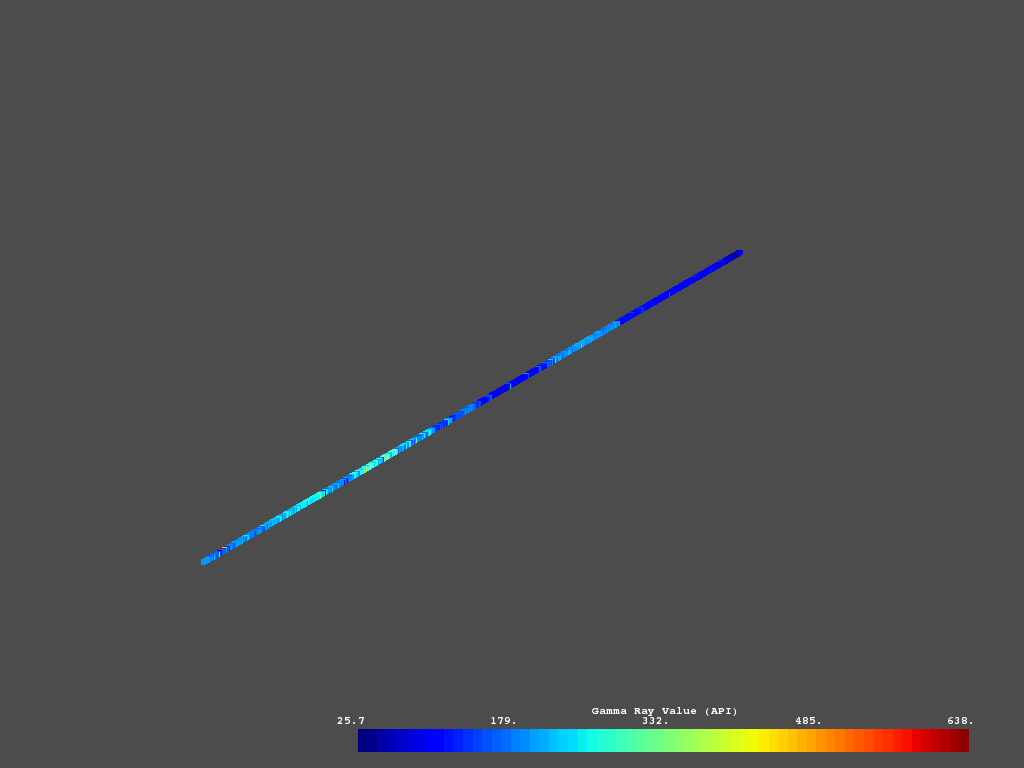

In [154]:
omfvtk.wrap(gamma).plot(show_edges=False)

## Neutron Porosity

In [155]:
nphi = omf.PointSetElement(
    name='neutron porosity',
    description='Neutron porosity well log of well 58-32. Neutron Porosity data was obtained with the following tools: '\
        'ECGR, GR, GR_EDTC, and HGR. HTNP_SAN, NPHI, NPOR, HTNP, and TNPH'\
        'For this example, NPHI was the well log chosen. ',
    subtype='point',
    geometry=omf.PointSetGeometry(
        vertices=well_log[['Depth (m)', 'x', 'y']].values
    ),
    data=[omf.ScalarData(
        name='Porosity (%)',
        array=well_log['NPHI'].values,
        location='vertices'
    ),]
)
nphi.validate()

True

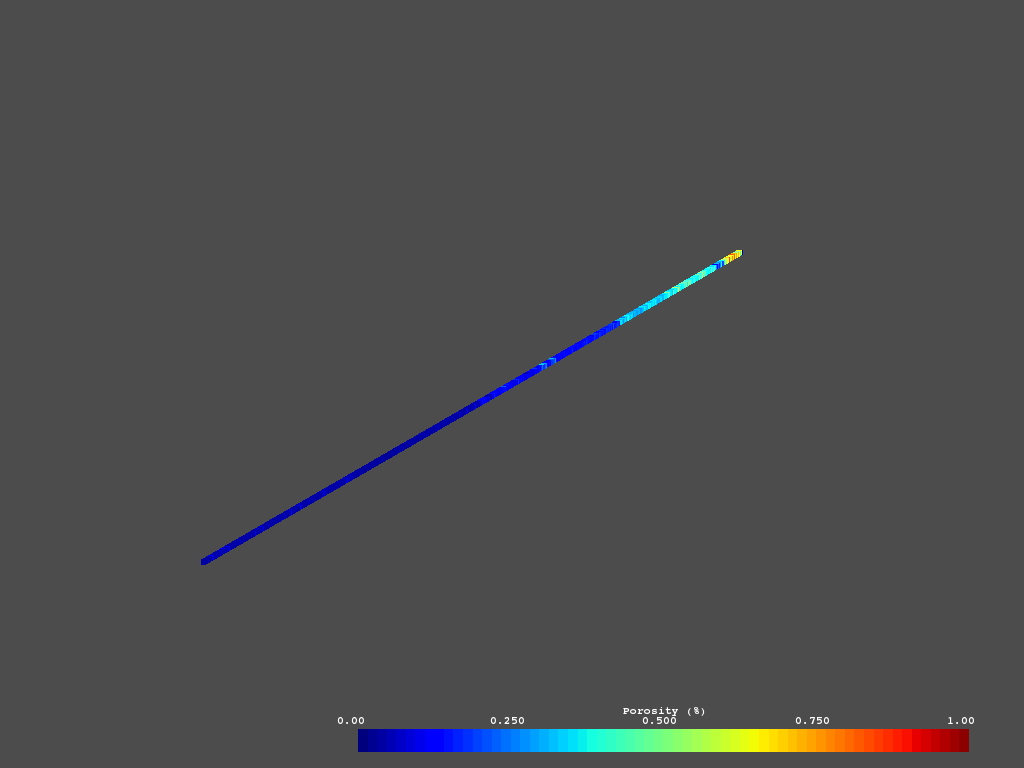

In [156]:
omfvtk.wrap(nphi).plot(show_edges=False, rng = (0,1))

## Bulk Density

In [157]:
density = omf.PointSetElement(
    name='bulk density',
    description='Bulk Density well log of well 58-32. Bulk Density data was obtained with the following tools: '\
        'RHOZ'\
        'For this example, RHOZ was the well log chosen. ',
    subtype='point',
    geometry=omf.PointSetGeometry(
        vertices=well_log[['Depth (m)', 'x', 'y']].values
    ),
    data=[omf.ScalarData(
        name='Density (g/cc)',
        array=well_log['RHOZ'].values,
        location='vertices'
    ),]
)
density.validate()

True

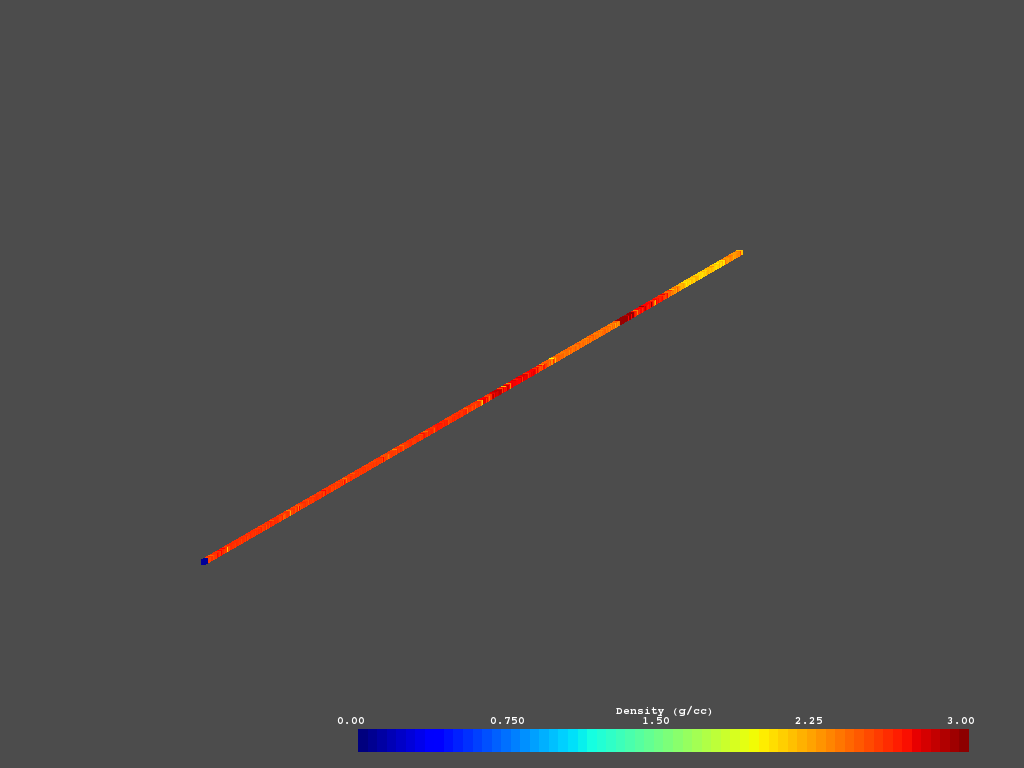

AttributeError: 'NoneType' object has no attribute 'save'

In [164]:
RHOB = omfvtk.wrap(density).plot(show_edges=False, rng = (0, 3))
RHOB.save('well_5832_RHOB.vtk')